In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inline as inline

%matplotlib inline


pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 100)

pd.options.mode.chained_assignment = None

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv')

c:\python\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_model = df[df.model.notnull()][['person', 'model']]
model_persons = df_model['person']                #  SERIE CON PERSONAS QEUE ESTA
df_model_users = df.loc[df['person'].isin(model_persons), :]
df_model_users_buys = df_model_users.loc[df['event'] == 'conversion']
models_counts = df_model_users_buys['model'].value_counts().head(8)
models_counts

Samsung Galaxy J5         88
iPhone 5s                 84
iPhone 6                  71
Samsung Galaxy S6 Flat    39
iPhone 6S                 37
iPhone 5c                 33
Motorola Moto G3 4G       30
Motorola Moto G4 Plus     30
Name: model, dtype: int64

In [46]:
sales_Samsung = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Samsung')].value_counts())
sales_iPhone = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('iPhone')].value_counts())
sales_Motorola = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Motorola')].value_counts())
sales_LG = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('LG')].value_counts())
sales_Sony = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Sony')].value_counts())
sales_Asus = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Asus')].value_counts())
sales_Lenovo = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Lenovo')].value_counts())

df_brand_sales = pd.DataFrame({'brand': ['Samsung', 'iPhone', 'Motorola', 'LG', 'Sony', 'Asus', 'Lenovo'],
                   'sales': [sales_Samsung, sales_iPhone, sales_Motorola, sales_LG, sales_Sony, sales_Asus, sales_Lenovo]})
df_brand_sales.sort_values('sales', ascending=False)


,brand,sales
0,Samsung,641
1,iPhone,323
2,Motorola,149
4,Sony,23
3,LG,20
6,Lenovo,14
5,Asus,2


Text(0, 0.5, 'Frequency')

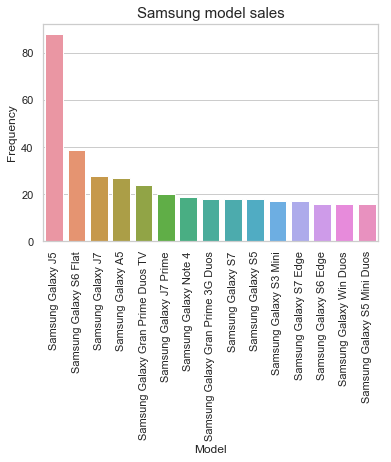

In [4]:
sales_Samsung = df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Samsung')].value_counts().head(15)

g2 = sns.barplot(x=sales_Samsung.index, y=sales_Samsung.values, orient = 'v')
plt.xticks(rotation=90)
g2.set_title("Samsung model sales", fontsize = 15)
g2.set_xlabel("Model", fontsize = 12)
g2.set_ylabel("Frequency", fontsize = 12)

Text(0, 0.5, 'Frequency')

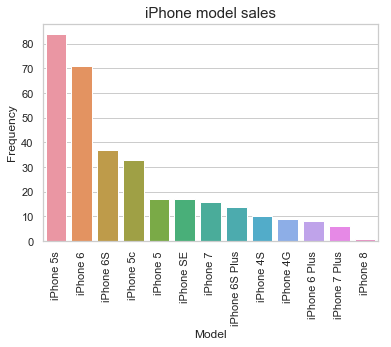

In [5]:
sales_iPhone = df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('iPhone')].value_counts().head(15)

g2 = sns.barplot(x=sales_iPhone.index, y=sales_iPhone.values, orient = 'v')
plt.xticks(rotation=90)
g2.set_title("iPhone model sales", fontsize = 15)
g2.set_xlabel("Model", fontsize = 12)
g2.set_ylabel("Frequency", fontsize = 12)

Text(0, 0.5, 'Frequency')

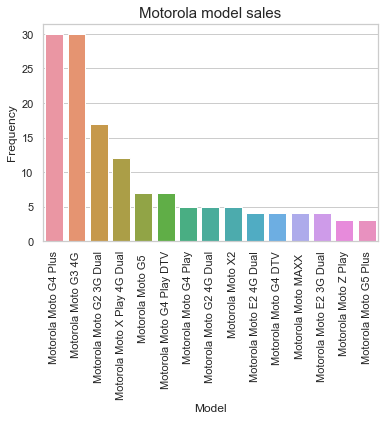

In [6]:
sales_Motorola = df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Motorola')].value_counts().head(15)

g2 = sns.barplot(x=sales_Motorola.index, y=sales_Motorola.values, orient = 'v')
plt.xticks(rotation=90)
g2.set_title("Motorola model sales", fontsize = 15)
g2.set_xlabel("Model", fontsize = 12)
g2.set_ylabel("Frequency", fontsize = 12)

In [47]:
df_releaseYear_model = pd.DataFrame({'model': ['Samsung Galaxy J5', 'iPhone 5s', 'iPhone 6', 'Samsung Galaxy S6 Flat',
                                               'iPhone 6S','iPhone 5c','Motorola Moto G4 Plus', 'Motorola Moto G3 4G'],
                   'releaseYear': [2017, 2013, 2014, 2015, 2015, 2013, 2016, 2015], 'sales': models_counts})

conditions = [
    df_releaseYear_model['model'].str.contains('Motorola'),
    df_releaseYear_model['model'].str.contains('Samsung'),
    df_releaseYear_model['model'].str.contains('iPhone')]

choices = ['Motorola', 'Samsung', 'iPhone']
sales_choices=[sales_Motorola, sales_Samsung, sales_iPhone]

df_releaseYear_model['brand']= np.select(conditions, choices, default='Unknown')
df_releaseYear_model['brand_sales']= np.select(conditions, sales_choices, default='Unknown')
df_releaseYear_model

,model,releaseYear,sales,brand,brand_sales
Samsung Galaxy J5,Samsung Galaxy J5,2017,88,Samsung,641
iPhone 5s,iPhone 5s,2013,84,iPhone,323
iPhone 6,iPhone 6,2014,71,iPhone,323
Samsung Galaxy S6 Flat,Samsung Galaxy S6 Flat,2015,39,Samsung,641
iPhone 6S,iPhone 6S,2015,37,iPhone,323
iPhone 5c,iPhone 5c,2013,33,iPhone,323
Motorola Moto G3 4G,Motorola Moto G4 Plus,2016,30,Motorola,149
Motorola Moto G4 Plus,Motorola Moto G3 4G,2015,30,Motorola,149


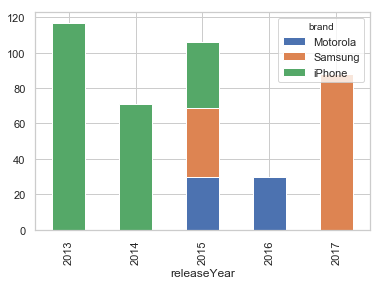

In [66]:
plot = pd.crosstab(index=df_releaseYear_model['releaseYear'],
            columns=df_releaseYear_model['brand'], values=df_releaseYear_model['sales'], aggfunc= np.sum).plot(kind='bar', stacked=True)



In [68]:
""" Podríamos inferir que, a la hora de comprar productos electrónicos con más de 4 años de antiguedad
en el mercado, hay mmayor confianza en los de la línea iPhone. 
También podríamos pensar que, siempre y cuando se trate de productos de los últimos 5 años, pesa más la marca que 
el año de lanzamiento. El segundo producto más vendido en los 6 meses analizados es un iPhone de 2013"""

' Podríamos inferir que, a la hora de comprar productos electrónicos con más de 4 años de antiguedad\nen el mercado, hay mmayor confianza en los de la línea iPhone. \nTambién podríamos pensar que, siempre y cuando se trate de productos de los últimos 5 años, pesa más la marca que \nel año de lanzamiento. El segundo producto más vendido en los 6 meses analizados es un iPhone de 2013'